In [1]:
import pandas as pd
df=pd.read_csv("/content/new4.csv")

ModuleNotFoundError: No module named 'pandas'

In [66]:
df.head()

,Stream,packet_count,src_dst_len,dst_src_len,freq_src_dst,freq_dst_src,prob_src_dst,prob_dst_src,total_prob_src_dst,total_prob_dst_src,total_prob,Attack Type
0,763.0,76.0,0.0,1514.0,0.0,3.0,0.000000,0.078947,0.000000,0.157895,0.157895,Password attacks
1,5755.0,20.0,87.0,0.0,1.0,0.0,0.058824,0.000000,0.294118,0.000000,0.350000,DDoS HTTP Flood Attacks
2,45.0,218.0,355.0,22942.0,2.0,0.0,0.009174,0.000000,0.311927,0.000000,0.183486,Vulnerability scanner attack
3,778.0,69.0,0.0,66.0,0.0,20.0,0.000000,0.625000,0.000000,0.108108,0.144928,Password attacks
4,518.0,78.0,74.0,0.0,7.0,0.0,0.179487,0.000000,0.128205,0.000000,0.141026,Password attacks


In [67]:
df.dropna()

,Stream,packet_count,src_dst_len,dst_src_len,freq_src_dst,freq_dst_src,prob_src_dst,prob_dst_src,total_prob_src_dst,total_prob_dst_src,total_prob,Attack Type
0,763.000000,76.000000,0.000000,1514.000000,0.000000,3.000000,0.000000,0.078947,0.000000,0.157895,0.157895,Password attacks
1,5755.000000,20.000000,87.000000,0.000000,1.000000,0.000000,0.058824,0.000000,0.294118,0.000000,0.350000,DDoS HTTP Flood Attacks
2,45.000000,218.000000,355.000000,22942.000000,2.000000,0.000000,0.009174,0.000000,0.311927,0.000000,0.183486,Vulnerability scanner attack
3,778.000000,69.000000,0.000000,66.000000,0.000000,20.000000,0.000000,0.625000,0.000000,0.108108,0.144928,Password attacks
4,518.000000,78.000000,74.000000,0.000000,7.000000,0.000000,0.179487,0.000000,0.128205,0.000000,0.141026,Password attacks
...,...,...,...,...,...,...,...,...,...,...,...,...
83543,696.888816,85.694592,89.198329,237.775142,3.871290,3.880505,0.091746,0.090006,0.061255,0.066731,0.131733,Password attacks
83544,696.978732,85.695715,89.199411,237.768253,3.871349,3.880550,0.091746,0.090005,0.061253,0.066731,0.131731,Password attacks
83545,697.068649,85.696837,89.200494,237.761365,3.871407,3.880595,0.091747,0.090005,0.061252,0.066731,0.131729,Password attacks
83546,697.158565,85.697960,89.201577,237.754477,3.871465,3.880640,0.091748,0.090005,0.061251,0.066731,0.131727,Password attacks


In [68]:
df.dropna(inplace=True)

In [69]:
x=df[['src_dst_len','dst_src_len','total_prob']]
y=df['Attack Type']

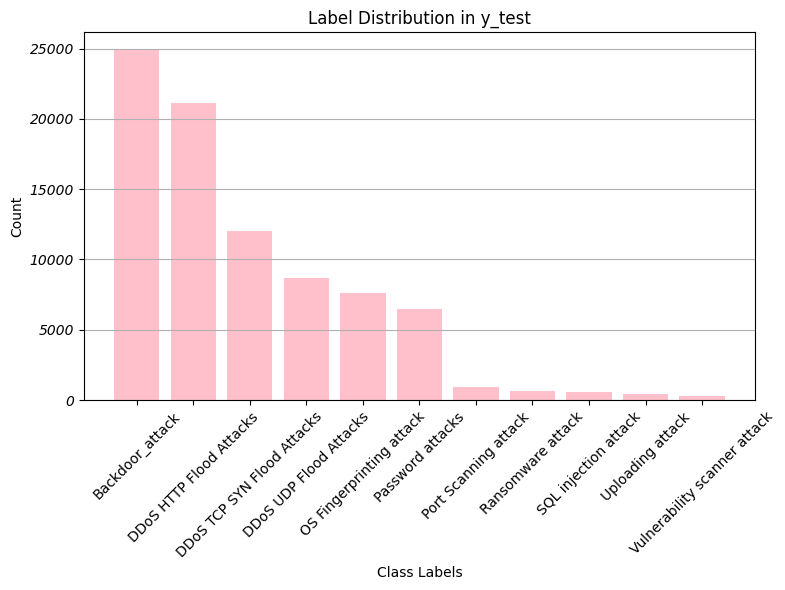

In [70]:
y_train_series = pd.Series(y)


# Count the occurrences of each label in y_train and y_test
train_label_counts = y_train_series.value_counts()


# Get the unique class labels from the original y data
unique_labels = sorted(y_train_series.unique())

plt.figure(figsize=(8, 6))
plt.bar(unique_labels, train_label_counts, color='pink')
plt.title('Label Distribution in y_test')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(unique_labels, rotation=45)  # Rotate the y-labels by 45 degrees
plt.yticks(fontstyle='italic')  # Set the y-labels in italic form
plt.grid(axis='y')
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


In [71]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Replace 'y' with the transformed labels
y

array([ 5,  1, 10, ...,  5,  5,  5])

In [72]:
x
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.        , 0.0659925 , 0.15434933],
       [0.05746367, 0.        , 0.34726339],
       [0.2344782 , 1.        , 0.18004858],
       ...,
       [0.0589171 , 0.01036358, 0.12807329],
       [0.05891782, 0.01036328, 0.12807134],
       [0.05891853, 0.01036298, 0.12806938]])

In [73]:

print(x.shape)
print(y.shape)

(83547, 3)
(83547,)


In [74]:
df.isnull().sum()

Stream                0
packet_count          0
src_dst_len           0
dst_src_len           0
freq_src_dst          0
freq_dst_src          0
prob_src_dst          0
prob_dst_src          0
total_prob_src_dst    0
total_prob_dst_src    0
total_prob            0
Attack Type           0
dtype: int64

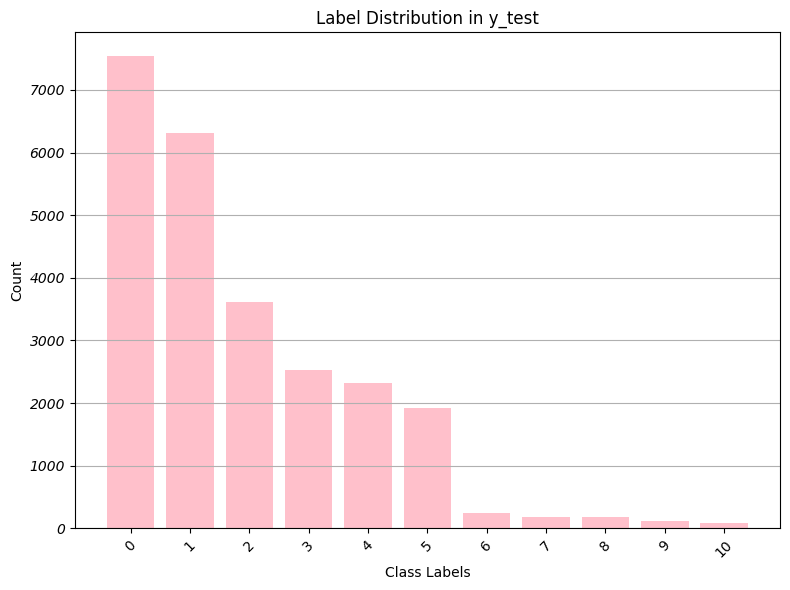

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split



X = x  # All columns except the target column
y = y  # Target column (attack types)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_series = pd.Series(y_test)


# Count the occurrences of each label in y_train and y_test
train_label_counts = y_train_series.value_counts()


# Get the unique class labels from the original y data
unique_labels = sorted(y_train_series.unique())

plt.figure(figsize=(8, 6))
plt.bar(unique_labels, train_label_counts, color='pink')
plt.title('Label Distribution in y_test')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(unique_labels, rotation=45)  # Rotate the y-labels by 45 degrees
plt.yticks(fontstyle='italic')  # Set the y-labels in italic form
plt.grid(axis='y')
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()




In [75]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Get a detailed classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.12      0.21       186
           1       0.97      0.96      0.97      7542
           2       1.00      0.54      0.70       176
           3       0.00      0.00      0.00       253
           4       0.00      0.00      0.00        93
           5       0.99      0.99      0.99      3621
           6       0.82      1.00      0.90      1925
           7       1.00      0.03      0.05       113
           8       0.72      0.89      0.80      2529
           9       0.85      0.67      0.75      2317
          10       0.91      0.94      0.92      6310

    accuracy                           0.90     25065
   macro avg       0.73      0.56      0.57     25065
weighted avg       0.90      0.90      0.89     25065



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


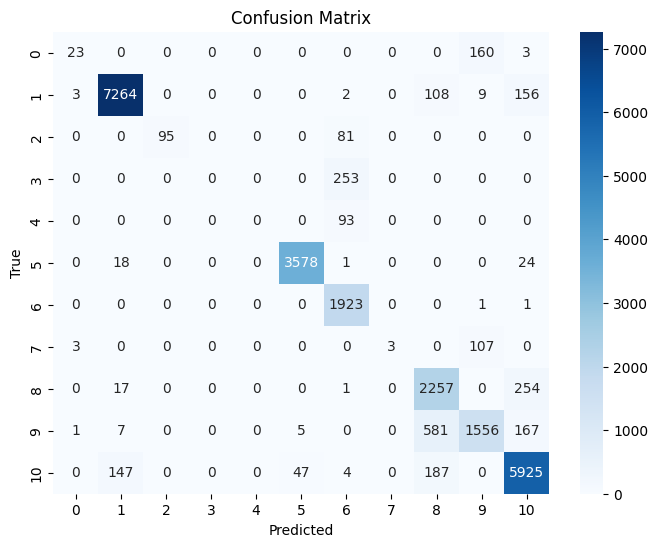

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


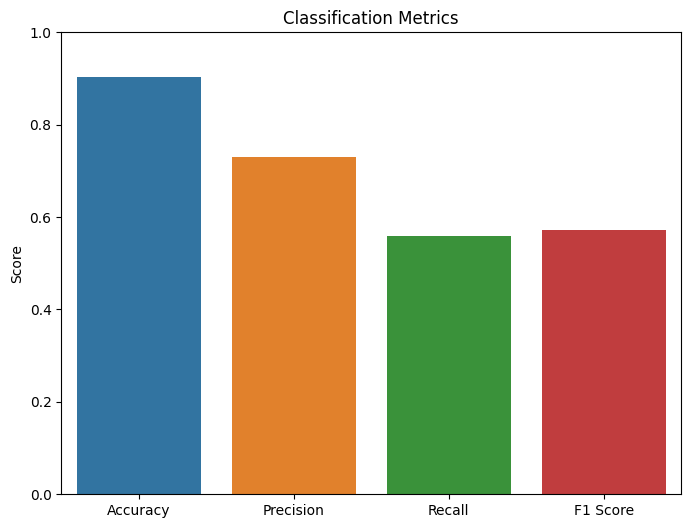

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting classification report metrics
report = classification_report(y_test, predictions, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to match scores (0 to 1)
plt.show()


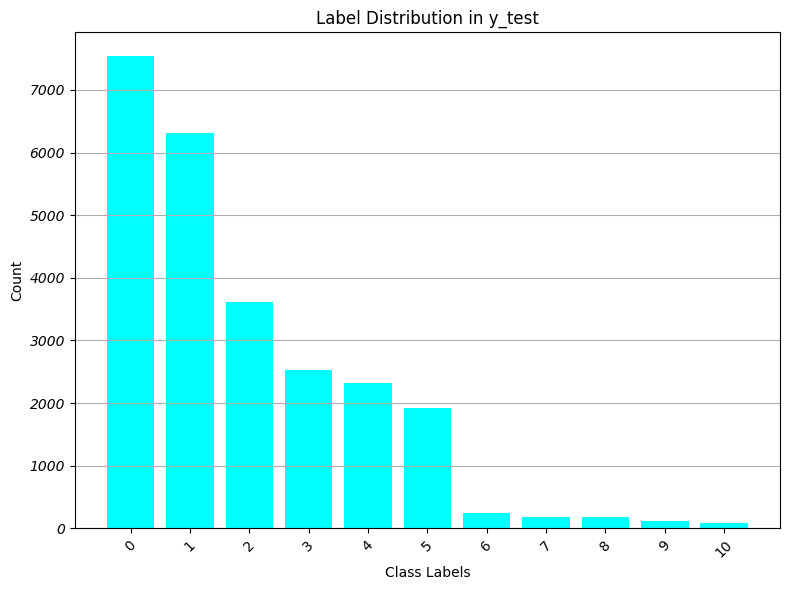

In [77]:
y_train_series = pd.Series(y_test)


# Count the occurrences of each label in y_train and y_test
train_label_counts = y_train_series.value_counts()


# Get the unique class labels from the original y data
unique_labels = sorted(y_train_series.unique())

plt.figure(figsize=(8, 6))
plt.bar(unique_labels, train_label_counts, color='cyan')
plt.title('Label Distribution in y_test')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(unique_labels, rotation=45)  # Rotate the y-labels by 45 degrees
plt.yticks(fontstyle='italic')  # Set the y-labels in italic form
plt.grid(axis='y')
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


In [78]:
# Assuming you have already trained your RandomForestClassifier model and have X_test and y_test
import pandas as pd

# Select a single test data point (for example, the first data point, index 0)
single_test_data = pd.DataFrame(X_test).iloc[[1001]]  # Assuming X_test is a pandas DataFrame
print(pd.DataFrame(y_test).iloc[[1001]])

# Predict the label for the single test data point
prediction_single = rf_classifier.predict(single_test_data)

print("Predicted Label for the Single Test Data Point:", prediction_single)


      0
1001  8
Predicted Label for the Single Test Data Point: [8]
